## E Coli GRN Stuff

AAAAAAAAAAAAAAA
1943


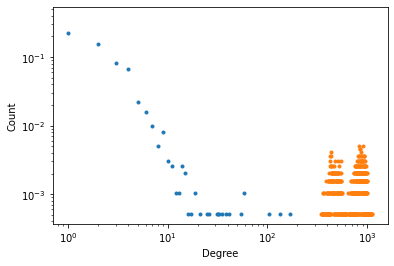

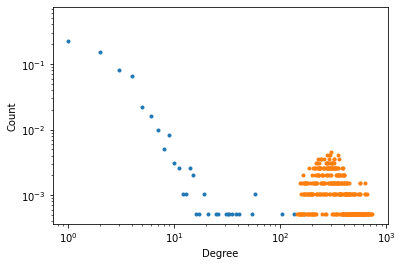

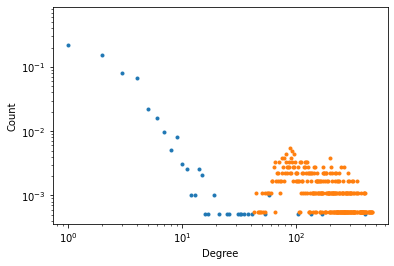

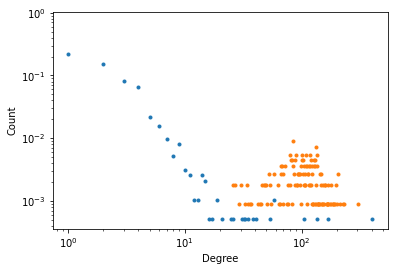

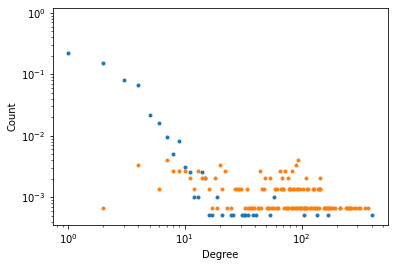

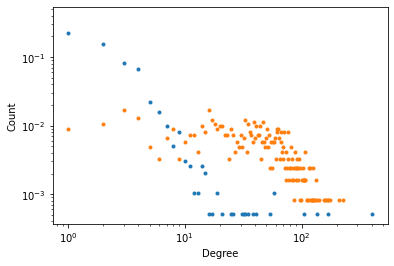

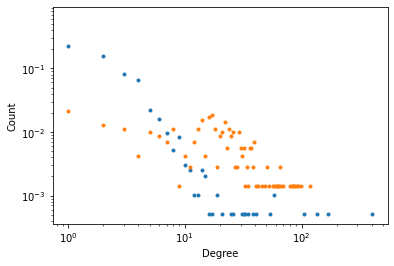

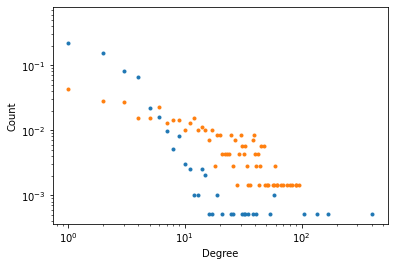

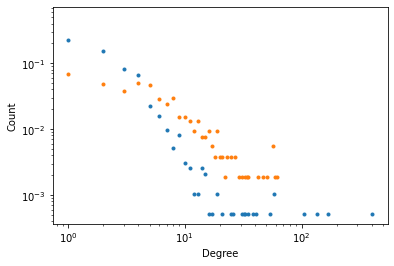

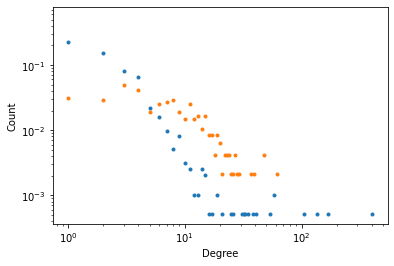

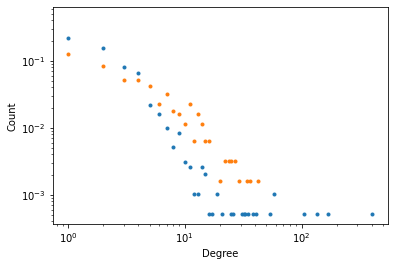

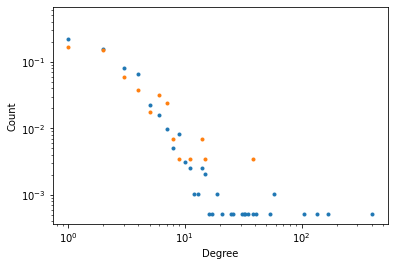

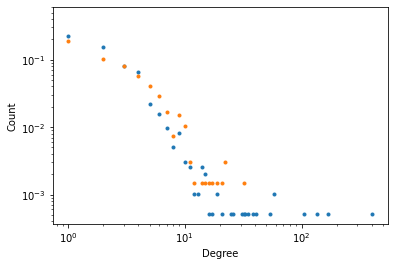

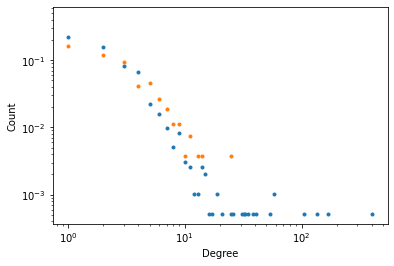

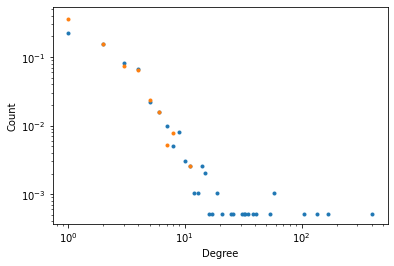

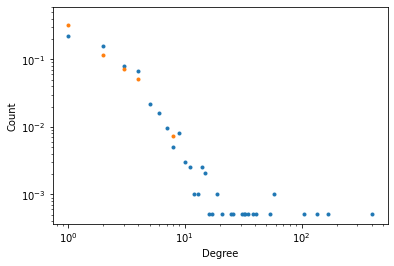

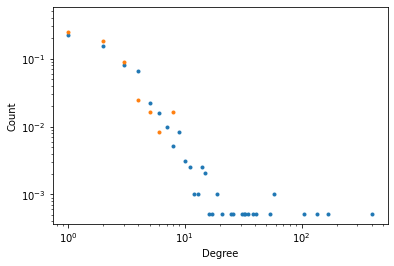

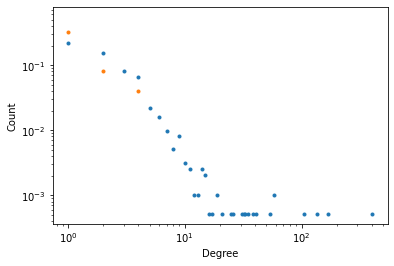

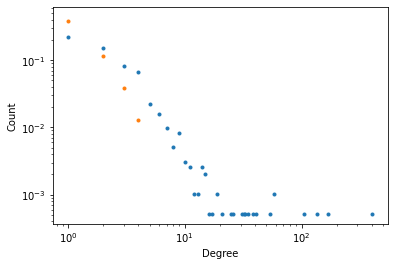

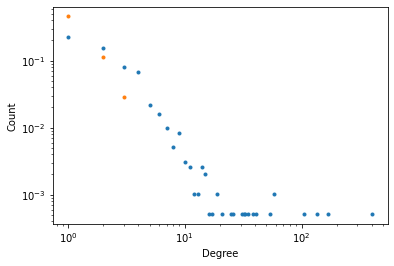

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)
#ut.loglog_degree_sequence_plot(G_coli)
'''
bins = np.arange(0, 200, 1) # fixed bin size

#plt.xlim([0, 200])



hist, bins = np.histogram(outList, bins=bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(outList, bins=bins, alpha=0.5,log=True)
plt.xscale('log')
plt.title('')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()
'''
G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
G_vec=[]
for q in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:

    G_q=dup.ped_pea_single_lineage(G,steps,0,q,iteration=0,isolated_nodes_allowed=False)
    
    #for i in G_q.nodes():
    #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
    #        node_remover.append(i)
    #if len(node_remover)!=0:
    #    G_q.remove_nodes_from(node_remover)
    G_vec.append(G_q)
    #ut.pair_loglog_degree_sequence_plot(G_q,G)
        
    #G=nx.Graph()
    #for e in G_sorg.edges():
    #    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


    #nt = Network('1000px', '1000px',directed=True)

    #nt.from_nx(G_coli)
    #nt.show_buttons()
    #nt.show('nx.html')
    plt.figure()
    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_coli.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_coli.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_coli.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_q.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_q.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_q.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    plt.xscale('log')
    plt.yscale('log')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()

    


In [9]:
import pickle
with open('G_vec.pkl', 'wb') as f:
    pickle.dump(G_vec, f)



In [ ]:


with open('G_vec.pkl', 'rb') as f:
    mybist=pickle.load(f)

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
print(G_col.nodes)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)

G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
G_dict=dict()
for r in [0.1]:
    for q in [0.8,0.9]:
        G_dict[(r,q)]=[]
        for i in range(1):
            print(r,q,i)
            G_q=dup.ped_pea_single_lineage(G,steps,r,q,iteration=0,isolated_nodes_allowed=False)
            
            #for i in G_q.nodes():
            #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
            #        node_remover.append(i)
            #if len(node_remover)!=0:
            #    G_q.remove_nodes_from(node_remover)
            G_dict[(r,q)].append(G_q)

with open('G_dict_rq.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


AAAAAAAAAAAAAAA
['accb', 'accc', 'acrr', 'acra', 'acrb', 'flhc', 'flhd', 'mara', 'marb', 'marr', 'micf', 'soxr', 'soxs', 'ada', 'aidb', 'alka', 'alkb', 'adiy', 'adia', 'gada', 'gadb', 'gadc', 'gadx', 'gltb', 'gltd', 'gltf', 'agar', 'agaa', 'agab', 'agac', 'agad', 'agai', 'agas', 'agav', 'agaw', 'kbay', 'kbaz', 'appy', 'appa', 'appb', 'appc', 'appx', 'hyaa', 'hyab', 'hyac', 'hyad', 'hyae', 'hyaf', 'arac', 'araa', 'arab', 'arad', 'arae', 'araf', 'arag', 'arah', 'araj', 'xyla', 'xylb', 'ydem', 'yden', 'ygea', 'arca', 'acea', 'aceb', 'acee', 'acef', 'acek', 'acka', 'acna', 'acnb', 'alda', 'arcz', 'beta', 'betb', 'beti', 'bett', 'cada', 'cadb', 'caia', 'caib', 'caic', 'caid', 'caie', 'cait', 'citc', 'citd', 'cite', 'citf', 'citg', 'citx', 'cyda', 'cydb', 'cydc', 'cydd', 'cyoa', 'cyob', 'cyoc', 'cyod', 'cyoe', 'dcta', 'dcuc', 'dpia', 'dpib', 'fada', 'fadb', 'fadd', 'fade', 'fadh', 'fadi', 'fadj', 'fadl', 'fnr', 'foca', 'fuma', 'fumb', 'fumc', 'gade', 'gadf', 'gata', 'gatb', 'gatc', 'gatd', '

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js
with open('G_dict_rq.pkl', 'rb') as f:
    mybist=pickle.load(f)

0.0021625427479380404


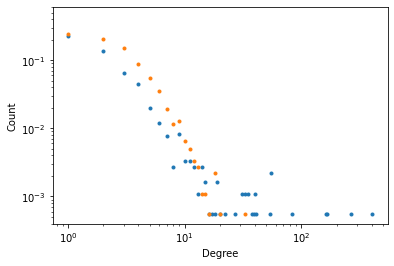

In [3]:
    print(nx.transitivity(mybist[(0.5,0.7)][0]))
    plt.figure()
    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_coli.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_coli.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_coli.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    out_deg_dist=dict()
    in_deg_dist=dict()
    for i in G_q.nodes:
            
        in_deg_dist[i]=0
        out_deg_dist[i]=0
        for j in G_q.predecessors(i):
            in_deg_dist[i]=in_deg_dist[i]+1
        for j in G_q.successors(i):
            out_deg_dist[i]=out_deg_dist[i]+1

    inList=list(in_deg_dist.values())
    outList=list(out_deg_dist.values())
    inList=sorted(inList)
    outList=sorted(outList)
    inDist=dict()
    outDist=dict()
    for i in set(inList):
        inDist[i]=inList.count(i)/len(inList)
    for i in set(outList):
        outDist[i]=outList.count(i)/len(outList)
    inList=sorted(list(set(inList)))
    outList=sorted(list(set(outList)))
    
    plt.plot(outList,list(outDist.values()),'.')
    #bins = np.arange(0, max(outList), 1) # fixed bin size

    #hist, bins = np.histogram(outList, bins=bins)
    #logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.hist(outList, bins=bins, alpha=0.5,log=True)

    plt.xscale('log')
    plt.yscale('log')
    plt.title('')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()



In [18]:
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)

G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)

dictG = nx.to_dict_of_dicts(G_coli)
for i in dictG.keys():
    
    dictG[i]=list(dictG[i].keys())

len(G_coli.nodes)
nt = Network('1000px', '1000px',directed=True)

nt.from_nx(G_coli)
nt.show_buttons()
nt.show('nx.html')

AAAAAAAAAAAAAAA


In [1]:

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
from Genetc import ancestral as anc
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
import pickle
import json as js



G=nx.DiGraph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,4),(3,4),(3,2),(4,4),(5,4)])

G=dup.GRN_seed_graph()
m=0
r=0
q=0.9
steps=1
iteration=0
while m<steps:
    G_test=dup.PED_PEA(G,r,q,iteration=iteration+m+1)
                
    node_remover=list(nx.isolates(G_test))
                
    if len(node_remover)==0:
                    
        m=m+1
        G=G_test
G=nx.erdos_renyi_graph(7,0.5,directed=True)
G=nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5,6,7,8])
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3) 
G.add_edge(4,5)
G.add_edge(4,6)
G.add_edge(4,7)
G.add_edge(8,4)

G.add_edge(0,4)
G.add_edge(8,8)
G.add_edge(4,4)
G.add_edge(0,'1_0')
m=0
r=0
q=0.5
#G=dup.PED_PEA(G,r,q,iteration=m)

'''steps=1
iteration=0
while m<steps:
    G_test=dup.PED_PEA(G,r,q,iteration=iteration+m+1)
                
    node_remover=list(nx.isolates(G_test))
                
    if len(node_remover)==0:
                    
        m=m+1
        G=G_test
  '''


'steps=1\niteration=0\nwhile m<steps:\n    G_test=dup.PED_PEA(G,r,q,iteration=iteration+m+1)\n                \n    node_remover=list(nx.isolates(G_test))\n                \n    if len(node_remover)==0:\n                    \n        m=m+1\n        G=G_test\n  '

0 1 0
0 2 0
0 3 0
0 4 1.0596381293402777e-07
0 5 2.712673611111111e-05
0 6 2.712673611111111e-05
0 7 2.712673611111111e-05
0 8 5.425347222222222e-05
0 1_0 0
1 2 0.05555555555555555
1 3 0.05555555555555555
1 4 5.425347222222222e-05
1 5 0.006944444444444444
1 6 0.006944444444444444
1 7 0.006944444444444444
1 8 0.001736111111111111
1 1_0 0.05555555555555555
2 3 0.05555555555555555
2 4 5.425347222222222e-05
2 5 0.006944444444444444
2 6 0.006944444444444444
2 7 0.006944444444444444
2 8 0.001736111111111111
2 1_0 0.05555555555555555
3 4 5.425347222222222e-05
3 5 0.006944444444444444
3 6 0.006944444444444444
3 7 0.006944444444444444
3 8 0.001736111111111111
3 1_0 0.05555555555555555
4 5 2.712673611111111e-05
4 6 2.712673611111111e-05
4 7 2.712673611111111e-05
4 8 5.425347222222222e-05
4 1_0 0
5 6 0.05555555555555555
5 7 0.05555555555555555
5 8 0.001736111111111111
5 1_0 0.006944444444444444
6 7 0.05555555555555555
6 8 0.001736111111111111
6 1_0 0.006944444444444444
7 8 0.001736111111111111
7 

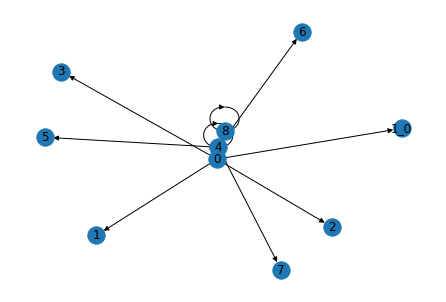

In [13]:
import random
        
#G.add_nodes_from([1,2,3,4])
#G.add_edges_from([(2,1),(3,2),(3,4),(1,1),(3,3),(4,2)])
#G15=anc.node_merger(G,3,4,self_loops=True)
#nx.draw(G15,with_labels=True)


#G=dup.GRN_seed_graph_ped_pea(100,0,0.4)
tally1=0
tally2=0
tally3=0
tally4=0
tally5=0
num=100000
'''for i in range(0,num):
    G15=anc.node_merger(G,1,2,self_loops=True)
    #nx.draw(G15,with_labels=True)
    G15_next=dup.PED_PEA(G15,0,0.5)
    if nx.is_isomorphic(G15_next,G):
        tally1=tally1+1
        #print(list(G15_next.predecessors(1)),list(G15_next.successors(1)))
        
    
    #for i in G15_next.nodes():
    #    if len(str(i))>1:
    #        if i[0]=='1':
    #            tally1=tally1+1
    #        elif i[0]=='2':
    #            tally2=tally2+1
    #        elif i[0]=='3':
    #            tally3=tally3+1
    #        elif i[0]=='4':
    #            tally4=tally4+1
    #        else:
    #            tally5=tally5+1
    #plt.figure()
    #nx.draw(G15_next,with_labels=True)
print(tally1/num)
print(tally2/num)
print(tally3/num)
print(tally4/num)
print(tally5/num)'''

maximum=0
q=0.5
maxPair=[]

for ind,i in enumerate(G.nodes):
    for j in list(G.nodes)[-(len(list(G.nodes))-ind-1):]:
      if ind<len(list(G.nodes))-1:
        GPrev=anc.node_merger(G,i,j,self_loops=True)
        testMax=anc.ancestral_likelihood_of_anchor_PD(G,GPrev,i,j,q,divide_by_n=True,NK=True)
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
        
        print(i,j,testMax)
for (i,j) in maxPair:
    if (j,i) not in maxPair:
        maxPair.append((j,i))
for (i,j) in maxPair:
        if (j,i) in maxPair:
            if list(G.nodes).index(i)<list(G.nodes).index(j):
                maxPair.remove((j,i))
            else:
                maxPair.remove((i,j)) 
print(maxPair)
maxPair=random.choice(maxPair)
print("navlakha chose",maxPair)
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=False,auto=True)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
print(maxPair)
maxPair=random.choice(maxPair)
print("auto notimestwo chose",maxPair)
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=True,auto=True)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))

for (i,j) in maxPair:
    if (j,i) not in maxPair:
        maxPair.append((j,i))

remover=[]
for (i,j) in maxPair:
    if (j,i) in maxPair:
        if list(G.nodes).index(i)<list(G.nodes).index(j):
            remover.append((j,i))
            
        else:
            remover.append((i,j)) 
            
maxPair=[i for i in maxPair if i not in remover]
print(maxPair)
maxPair=random.choice(maxPair)
print("auto timesTwo chose",maxPair)
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=False,auto=False)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
print(maxPair)
maxPair=random.choice(maxPair)
print("no auto no timesTwo chose",maxPair)
'''
'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph_fast(G,q,divide_by_n=True,timesTwo=True,auto=False)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
print(maxPair)
maxPair=random.choice(maxPair)
print("no auto timesTwo chose",maxPair)

'''
maximum=0
maxPair=[]
goodLikelihoods=anc.most_likely_previous_graph(G,q,divide_by_n=True)
print(goodLikelihoods)
for j in goodLikelihoods:
    for i in goodLikelihoods[j]:
        testMax=goodLikelihoods[j][i]
        if testMax>maximum:
            maximum=testMax
            maxPair=[]
        if testMax==maximum:
            maxPair.append((i,j))
for (i,j) in maxPair:
    if (j,i) not in maxPair:
        maxPair.append((j,i))
for (i,j) in maxPair:
        if (j,i) in maxPair:
            if list(G.nodes).index(i)<list(G.nodes).index(j):
                maxPair.remove((j,i))
            else:
                maxPair.remove((i,j))  
print(maxPair)
maxPair=random.choice(maxPair)
print("baseline chose",maxPair)
nx.draw(G,with_labels=True)

## Generate the true networks


### Model seed

In [ ]:
#Generate 1000 node networks and record their history and save to a pickle
#Reconstruct history with each approach and save the histories to a pickle
#Measure various things about each algorithm and compare them to groundtruth

#The dictionary produced here has the extant graph as the last entry, and the seed graph as the first.
#This is in contrast to the dictionaries produced from the ancestral reconstruction, where the extant 
#graph is not included, the first graph is one step back in time, and the last graph is the estimate
#of the seed graph.

#The i'th position of the ancestral vector should be compared to the i-2th position of the tru graph 
#vector.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
#seedType='ER'
seedType='model'
sampleNo=100
G_dict=dict()
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        iteration=0
        steps=24
        m=0
        G_seed=nx.DiGraph()
        
        G_seed.add_edge(0,0)
        
        while m<steps:
            G_seed_test=dup.PED_PEA(G_seed,r,q,iteration=iteration+m+1)
            while not nx.is_connected(G_seed_test.to_undirected()):
                G_seed_test=dup.PED_PEA(G_seed,r,q,iteration=iteration+m+1)
            
                
            m=m+1
            G_seed=G_seed_test
            
                
        plt.figure()
        nx.draw(G_seed,with_labels=True)
        steps=50-len(G_seed.nodes)
        print(steps)
        node_remover=[]
        
        r=0
        G_dict[q]=dict()
        for i in range(sampleNo):
            iteration=24
            G_q=G_seed
            G_dict[q][i]=[]
            print(q,i)
            m=0
            G_dict[q][i].append(G_q)
            while m<steps:
                G_q_test=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                while not nx.is_connected(G_q_test.to_undirected()):
                    G_q_test=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                
                m=m+1
                G_q=G_q_test
                G_dict[q][i].append(G_q)

with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


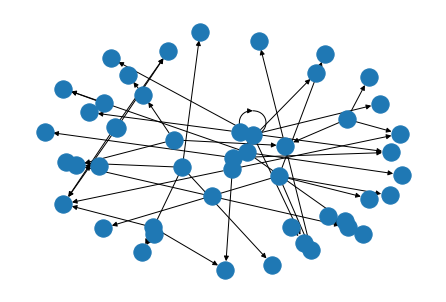

In [81]:
nx.draw(G_dict[0.9][0][24])

### GRN seed


In [ ]:
#Generate 1000 node networks and record their history and save to a pickle
#Reconstruct history with each approach and save the histories to a pickle
#Measure various things about each algorithm and compare them to groundtruth

#The dictionary produced here has the extant graph as the last entry, and the seed graph as the first.
#This is in contrast to the dictionaries produced from the ancestral reconstruction, where the extant 
#graph is not included, the first graph is one step back in time, and the last graph is the estimate
#of the seed graph.

#The i'th position of the ancestral vector should be compared to the i-2th position of the tru graph 
#vector.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
#seedType='ER'
seedType='GRN'
sampleNo=100
G_q=dup.GRN_seed_graph()
steps=50-len(G_q.nodes)
print(steps)
node_remover=[]
G_dict=dict()
r=0
iteration=0
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        G_dict[q]=dict()
        for i in range(sampleNo):
            G_q=dup.GRN_seed_graph()
            G_dict[q][i]=[]
            print(q,i)
            m=0
            G_dict[q][i].append(G_q)
            while m<steps:
                G_q_test=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                
                node_remover=list(nx.isolates(G_q_test))
                
                if len(node_remover)==0:
                
                    m=m+1
                    G_q=G_q_test
                    G_dict[q][i].append(G_q)

with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


### ER Seed

In [ ]:
#Generate 1000 node networks and record their history and save to a pickle
#Reconstruct history with each approach and save the histories to a pickle
#Measure various things about each algorithm and compare them to groundtruth

#The dictionary produced here has the extant graph as the last entry, and the seed graph as the first.
#This is in contrast to the dictionaries produced from the ancestral reconstruction, where the extant 
#graph is not included, the first graph is one step back in time, and the last graph is the estimate
#of the seed graph.

#The i'th position of the ancestral vector should be compared to the i-2th position of the tru graph 
#vector.
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
#seedType='ER'
seedType='ER'
sampleNo=100
G_seed=nx.erdos_renyi_graph(25,0.1,directed=True)
while not nx.is_connected(G_seed.to_undirected()):
    G_seed=nx.erdos_renyi_graph(25,0.1,directed=True)
print("is directed",nx.is_directed(G_seed))
for i in range(3):
    rand=np.random.randint(0,len(G_seed.nodes))
    G_seed.add_edge(rand,rand)
steps=50-len(G_seed.nodes)
print(steps)
node_remover=[]
G_dict=dict()
r=0
iteration=0
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        G_dict[q]=dict()
        for i in range(sampleNo):
            G_q=G_seed
            G_dict[q][i]=[]
            print(q,i)
            m=0
            G_dict[q][i].append(G_q)
            while m<steps:
                G_q_test=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                
                node_remover=list(nx.isolates(G_q_test))
                
                if len(node_remover)==0:
                
                    m=m+1
                    G_q=G_q_test
                    G_dict[q][i].append(G_q)

with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'wb') as f:
    pickle.dump(G_dict, f)


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
from Genetc import alignment as al
import pickle
seedType='GRN'
with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'rb') as f:
    graphDict=pickle.load(f)
#print(graphDict)

In [ ]:
sampleNo=100
G_q=dup.GRN_seed_graph()
steps=50-len(G_q.nodes)
print(steps)
node_remover=[]
graphDict=dict()
r=0
iteration=0
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
        graphDict[q]=dict()
        for i in range(sampleNo):
            G_q=nx.erdos_renyi_graph(25,0.2,directed=True)
            graphDict[q][i]=[]
            print(q,i)
            m=0
            graphDict[q][i].append(G_q)
            while m<steps:
                G_q_noauto=dup.PED_PEA(G_q,r,q,iteration=iteration+m+1)
                
                node_remover=list(nx.isolates(G_q_noauto))
                
                if len(node_remover)==0:
                
                    m=m+1
                    G_q=G_q_test
                    graphDict[q][i].append(G_q)


## Create the ancestral reconstructions

### Randomly select pairs to merge as baseline

In [4]:
from Genetc import ancestral as anc
import random

randDict=dict()
sampleNo=100
maxPairsRand=dict()

#decideType='random'
decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
count=0
for q in graphDict:
    #print(q)
    randDict[q]=dict()
    
    maxPairsRand[q]=dict()
    
    #finalGraph=graphDict[q][k][-1]

    for k in range(sampleNo):
        #print(k)
        
        randDict[q][k]=[]
    
        maxPairsRand[q][k]=[]
        finalGraph=graphDict[q][k][-1]
        G_rand=finalGraph
        maximum=0
        while len(G_rand.nodes)>stepsBack:
            
            graphDictIndex=len(G_rand.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=[(i,j) for ind, i in enumerate(G_rand.nodes) for jnd,j in enumerate(G_rand.nodes) if ind<jnd]
            
                               
            maxPair=random.choice(goodLikelihoods)
            if len(G_rand.nodes)==50:
                
                        if isinstance(maxPair[1],str):
                            count=count+1 
            G_rand=anc.node_merger(G_rand,maxPair[0],maxPair[1],self_loops=True)
            randDict[q][k].append(G_rand)
            maxPairsRand[q][k].append(maxPair)

print((count/1000))
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_rand.pkl', 'wb') as g:
    pickle.dump(randDict, g)

[0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
0.765


### Check the times two condition

In [ ]:
from Genetc import ancestral as anc
import random

notimestwoDict=dict()
sampleNo=100
maxPairsNotimestwo=dict()

decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in graphDict:
    print(q)
    notimestwoDict[q]=dict()
    
    maxPairsNotimestwo[q]=dict()
    
    #finalGraph=graphDict[q][k][-1]
    
    
    
    for k in range(sampleNo):
        print(k)
        notimestwoDict[q][k]=[]
    
        maxPairsNotimestwo[q][k]=[]
        finalGraph=graphDict[q][k][-1]
        G_notimestwo=finalGraph
        maximum=0
        while len(G_notimestwo.nodes)>stepsBack:
            
            graphDictIndex=len(G_notimestwo.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_notimestwo,q,divide_by_n=True,timesTwo=False,auto=True)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                             
                maxPair=random.choice(maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_notimestwo,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
    
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwo.pkl', 'wb') as g:
    pickle.dump(notimestwoDict, g)

In [ ]:
from Genetc import ancestral as anc
import random

noautoDict=dict()
sampleNo=100
maxPairsNoauto=dict()

decideType='max_EC'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in graphDict:
    print(q)
    noautoDict[q]=dict()
    
    maxPairsNoauto[q]=dict()
    
    finalGraph=graphDict[q][k][-1]
    
    
    
    for k in range(sampleNo):
        print(k)
        noautoDict[q][k]=[]
    
        maxPairsNoauto[q][k]=[]
        finalGraph=graphDict[q][k][-1]
        G_noauto=finalGraph
        maximum=0
        while len(G_noauto.nodes)>stepsBack:
            
            graphDictIndex=len(G_noauto.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_noauto(G_noauto,q,divide_by_n=True)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_noauto,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
    
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_noauto.pkl', 'wb') as g:
    pickle.dump(noautoDict, g)

### Check all combos of timestwo and auto

In [ ]:
from Genetc import ancestral as anc
import random
nkDict=dict()
testDict=dict()
noautoDict=dict()
notimestwoDict=dict()
notimestwonoautoDict=dict()
sampleNo=100
maxPairsNK=dict()
maxPairsTest=dict()
maxPairsNoauto=dict()
maxPairsNotimestwo=dict()
maxPairsNotimestwonoauto=dict()
decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    print(q)
    nkDict[q]=dict()
    testDict[q]=dict()
    maxPairsNK[q]=dict()
    maxPairsTest[q]=dict()
    noautoDict[q]=dict()
    maxPairsNoauto[q]=dict()
    notimestwoDict[q]=dict()
    maxPairsNotimestwo[q]=dict()
    notimestwonoautoDict[q]=dict()
    maxPairsNotimestwonoauto[q]=dict()
    for k in range(sampleNo):
        print(k)
        nkDict[q][k]=[]
        testDict[q][k]=[]
        maxPairsNK[q][k]=[]
        maxPairsTest[q][k]=[]
        noautoDict[q][k]=[]
        maxPairsNoauto[q][k]=[]
        notimestwoDict[q][k]=[]
        maxPairsNotimestwo[q][k]=[]
        notimestwonoautoDict[q][k]=[]
        maxPairsNotimestwonoauto[q][k]=[]

        finalGraph=graphDict[q][k][-1]
        maximum=0
        G_nk=finalGraph
        while len(G_nk.nodes)>stepsBack:
            graphDictIndex=len(G_nk.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            for ind,i in enumerate(G_nk.nodes):
                for j in list(G_nk.nodes)[-(len(list(G_nk.nodes))-ind-1):]:
                    #print(q,k,i,j)
                    if ind<len(list(G_nk.nodes))-1:
                        GPrev=anc.node_merger(G_nk,i,j,self_loops=True)
                        testMax=anc.ancestral_likelihood_of_anchor_PD(G_nk,GPrev,i,j,q,divide_by_n=True,NK=True)
                        if testMax>maximum:
                            maximum=testMax
                            maxPair=[]
                        if testMax==maximum:
                            maxPair.append((i,j))
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_nk.nodes).index(i)<list(G_nk.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                        
                maxPair=random.choice(maxPair)
                G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
                nkDict[q][k].append(G_nk)
                maxPairsNK[q][k].append(maxPair)
            #print("nk pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_nk.nodes).index(i)<list(G_nk.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_nk,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("nk post_EC maxpair",maxPair)
                G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
                nkDict[q][k].append(G_nk)
                maxPairsNK[q][k].append(maxPair)
            #if maxPair[0] not in graphDict[q][k][-1-nodesLeft] and maxPair[1] in graphDict[q][k][-1-nodesLeft]:
            #    G_nk=anc.node_merger(G_nk,maxPair[1],maxPair[0],self_loops=True)
            #    nkDict[q][k].append(G_nk)
            #elif maxPair[0] in graphDict[q][k][-1-nodesLeft] and maxPair[1] not in graphDict[q][k][-1-nodesLeft]:
            #    G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
            #    nkDict[q][k].append(G_nk)
            #else:
            #    rando=np.random.random()
            #    if rando<0.5:
            #        G_nk=anc.node_merger(G_nk,maxPair[0],maxPair[1],self_loops=True)
            #        nkDict[q][k].append(G_nk)
            #    else:
            #        G_nk=anc.node_merger(G_nk,maxPair[1],maxPair[0],self_loops=True)
            #        nkDict[q][k].append(G_nk)
            
        G_test=finalGraph
        while len(G_test.nodes)>stepsBack:
            #nodesLeft=len(finalGraph.nodes)-len(G_test.nodes)
            graphDictIndex=len(G_test.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_test,q,divide_by_n=True,timesTwo=True,auto=True)
            #print(goodLikelihoods)
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    #print(q,k,i,j)
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                             
                maxPair=random.choice(maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
            #print("test: pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_test.nodes).index(i)<list(G_test.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_test,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
                testDict[q][k].append(G_test)
                maxPairsTest[q][k].append(maxPair)
        #-----------------------------------------------------
        G_noauto=finalGraph
        maximum=0
        while len(G_noauto.nodes)>stepsBack:
            
            graphDictIndex=len(G_noauto.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_noauto,q,divide_by_n=True,timesTwo=True,auto=False)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_noauto.nodes).index(i)<list(G_noauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_noauto,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_noauto=anc.node_merger(G_noauto,maxPair[0],maxPair[1],self_loops=True)
                noautoDict[q][k].append(G_noauto)
                maxPairsNoauto[q][k].append(maxPair)
        #------------------------------------------
        G_notimestwo=finalGraph
        maximum=0
        while len(G_notimestwo.nodes)>stepsBack:
            
            graphDictIndex=len(G_notimestwo.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_notimestwo,q,divide_by_n=True,timesTwo=False,auto=True)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwo.nodes).index(i)<list(G_notimestwo.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_notimestwo,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_notimestwo=anc.node_merger(G_notimestwo,maxPair[0],maxPair[1],self_loops=True)
                notimestwoDict[q][k].append(G_notimestwo)
                maxPairsNotimestwo[q][k].append(maxPair)
        #-------------------------------------------------------
        G_notimestwonoauto=finalGraph
        maximum=0
        while len(G_notimestwonoauto.nodes)>stepsBack:
            
            graphDictIndex=len(G_notimestwonoauto.nodes)-len(finalGraph.nodes)-2
            
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph_fast(G_notimestwonoauto,q,divide_by_n=True,timesTwo=False,auto=False)
            
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwonoauto.nodes).index(i)<list(G_notimestwonoauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                           
                maxPair=random.choice(maxPair)
                G_notimestwonoauto=anc.node_merger(G_notimestwonoauto,maxPair[0],maxPair[1],self_loops=True)
                notimestwonoautoDict[q][k].append(G_notimestwonoauto)
                maxPairsNotimestwonoauto[q][k].append(maxPair)
            
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_notimestwonoauto.nodes).index(i)<list(G_notimestwonoauto.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_notimestwonoauto,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_notimestwonoauto=anc.node_merger(G_notimestwonoauto,maxPair[0],maxPair[1],self_loops=True)
                notimestwonoautoDict[q][k].append(G_notimestwonoauto)
                maxPairsNotimestwonoauto[q][k].append(maxPair)
            #if maxPair[0] not in graphDict[q][k][-1-nodesLeft] and maxPair[1] in graphDict[q][k][-1-nodesLeft]:
            #    G_test=anc.node_merger(G_test,maxPair[1],maxPair[0],self_loops=True)
            #    testDict[q][k].append(G_test)
            #elif maxPair[0] in graphDict[q][k][-1-nodesLeft] and maxPair[1] not in graphDict[q][k][-1-nodesLeft]:
            #    G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
            #    testDict[q][k].append(G_test)
            #else:
            #    rando=np.random.random()
            #    if rando<0.5:
            #        G_test=anc.node_merger(G_test,maxPair[0],maxPair[1],self_loops=True)
            #        testDict[q][k].append(G_test)
            #    else:
            #        G_test=anc.node_merger(G_test,maxPair[1],maxPair[0],self_loops=True)
            #        testDict[q][k].append(G_test)
            
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nk.pkl', 'wb') as f:
    pickle.dump(nkDict, f)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_test.pkl', 'wb') as g:
    pickle.dump(testDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_noauto.pkl', 'wb') as g:
    pickle.dump(noautoDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwo.pkl', 'wb') as g:
    pickle.dump(notimestwoDict, g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwonoauto.pkl', 'wb') as g:
    pickle.dump(notimestwonoautoDict, g)

### Compare fixed and original version of my alg

In [ ]:
from Genetc import ancestral as anc
import random

brokeDict=dict()


sampleNo=100

maxPairsBroke=dict()


decideType='random'
#decideType='max_EC'
#decideType='max_likelihood'
#decideType='max_lineage_likelihood'
stepsBack=25
print([q for q in graphDict])
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
   
    brokeDict[q]=dict()
    
    maxPairsBroke[q]=dict()
   
    
    for k in range(sampleNo):
        
        brokeDict[q][k]=[]
        
        maxPairsBroke[q][k]=[]
        
        

        finalGraph=graphDict[q][k][-1]
       
        G_broke=finalGraph
        while len(G_broke.nodes)>stepsBack:
            #nodesLeft=len(finalGraph.nodes)-len(G_test.nodes)
            graphDictIndex=len(G_broke.nodes)-len(finalGraph.nodes)-2
            #print(graphDictIndex)
            maximum=0
            maxPair=[]
            goodLikelihoods=anc.most_likely_previous_graph(G_broke,q,divide_by_n=True)
            #print(goodLikelihoods)
            for j in goodLikelihoods:
                for i in goodLikelihoods[j]:
                    #print(q,k,i,j)
                    testMax=goodLikelihoods[j][i]
                    if testMax>maximum:
                        maximum=testMax
                        maxPair=[]
                    if testMax==maximum:
                        maxPair.append((i,j))
            
            if decideType=='random':
                
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_broke.nodes).index(i)<list(G_broke.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                                            
                maxPair=random.choice(maxPair)
                G_broke=anc.node_merger(G_broke,maxPair[0],maxPair[1],self_loops=True)
                brokeDict[q][k].append(G_broke)
                maxPairsBroke[q][k].append(maxPair)
            #print("test: pre_EC maxpair",maxPair)
            if decideType=='max_EC':
                maximumEC=0
                for (i,j) in maxPair:
                    if (j,i) not in maxPair:
                        maxPair.append((j,i))

                remover=[]
                for (i,j) in maxPair:
                    if (j,i) in maxPair:
                        if list(G_broke.nodes).index(i)<list(G_broke.nodes).index(j):
                            remover.append((j,i))
                            
                        else:
                            remover.append((i,j)) 
                            
                maxPair=[i for i in maxPair if i not in remover]
                maxPairEC=[]
                #maximumGEC=[]
                
                for ind,i in enumerate(maxPair):
                    currentPair=maxPair[ind]
                    G_EC=anc.node_merger(G_broke,currentPair[0],currentPair[1],self_loops=True)
                    currentEC=al.quick_ec_score(G_EC,graphDict[q][k][graphDictIndex])
                    if currentEC>=maximumEC:
                        if currentEC>maximumEC:
                            #maximumGEC=[]
                            maxPairEC=[]
                        maximumEC=currentEC
                        maxPairEC.append(currentPair)
                        #maximumGEC.append(G_EC)
                maxPair=random.choice(maxPairEC)
                #print("test: post_EC maxpair",maxPair)
                G_broke=anc.node_merger(G_broke,maxPair[0],maxPair[1],self_loops=True)
                brokeDict[q][k].append(G_broke)
                maxPairsBroke[q][k].append(maxPair)

with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_broke.pkl', 'wb') as g:
    pickle.dump(brokeDict, g)


## Load in the ancestral reconstructions


In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import pickle
seedType='GRN'
decideType='random'
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_nk.pkl', 'rb') as f:
    G_nk=pickle.load(f)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_test.pkl', 'rb') as g:
    G_test=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_noauto.pkl', 'rb') as g:
    G_noauto=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwo.pkl', 'rb') as g:
    G_notimestwo=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_notimestwonoauto.pkl', 'rb') as g:
    G_notimestwonoauto=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/'+decideType+'_decide/G_dict_rq_nktest_rand.pkl', 'rb') as g:
    G_rand=pickle.load(g)
with open('likelihood_test/'+seedType+'_seed/G_dict_rq_nktest.pkl', 'rb') as h:
    graphDict=pickle.load(h)

## Plot EC Score


In [ ]:
from Genetc import alignment as al
sampleNo=100
stepsBack=24
steps_back=[i for i in range(stepsBack)]
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
#for q in [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    nkVec=[]
    testVec=[]
    noautoVec=[]
    randVec=[]
    notimestwoVec=[]
    notimestwonoautoVec=[]
    nkVecMean=[]
    testVecMean=[]
    noautoVecMean=[]
    randVecMean=[]
    notimestwoVecMean=[]
    notimestwonoautoVecMean=[]
    nkVecStd=[]
    testVecStd=[]
    noautoVecStd=[]
    randVecStd=[]
    notimestwoVecStd=[]
    notimestwonoautoVecStd=[]
    #print(list(graphDict[q][0][-1].nodes))
    for i in steps_back:
        nkVec=[]
        testVec=[]
        noautoVec=[]
        randVec=[]
        notimestwoVec=[]
        notimestwonoautoVec=[]
        print(i)
        for k in range(sampleNo):
            
            nkVec.append(al.quick_ec_score(G_nk[q][k][i],graphDict[q][k][-i-2]))
            noautoVec.append(al.quick_ec_score(G_noauto[q][k][i],graphDict[q][k][-i-2]))
            testVec.append(al.quick_ec_score(G_test[q][k][i],graphDict[q][k][-i-2]))
            randVec.append(al.quick_ec_score(G_rand[q][k][i],graphDict[q][k][-i-2]))
            notimestwoVec.append(al.quick_ec_score(G_notimestwo[q][k][i],graphDict[q][k][-i-2]))
            notimestwonoautoVec.append(al.quick_ec_score(G_notimestwonoauto[q][k][i],graphDict[q][k][-i-2]))
        
        nkVecMean.append(np.mean(nkVec))
        nkVecStd.append(np.std(nkVec,ddof=1))
        
        testVecMean.append(np.mean(testVec))
        testVecStd.append(np.std(testVec,ddof=1))

        noautoVecMean.append(np.mean(noautoVec))
        noautoVecStd.append(np.std(noautoVec,ddof=1))
        
        randVecMean.append(np.mean(randVec))
        randVecStd.append(np.std(randVec,ddof=1))

        notimestwoVecMean.append(np.mean(notimestwoVec))
        notimestwoVecStd.append(np.std(notimestwoVec,ddof=1))

        notimestwonoautoVecMean.append(np.mean(notimestwonoautoVec))
        notimestwonoautoVecStd.append(np.std(notimestwonoautoVec,ddof=1))

    print(nkVecMean)
    print(noautoVecMean)
    nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    noautoVecStdUp=[noautoVecMean[i]+1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    noautoVecStdDown=[noautoVecMean[i]-1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    randVecStdUp=[randVecMean[i]+1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    randVecStdDown=[randVecMean[i]-1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    notimestwoVecStdUp=[notimestwoVecMean[i]+1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    notimestwoVecStdDown=[notimestwoVecMean[i]-1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]

    notimestwonoautoVecStdUp=[notimestwonoautoVecMean[i]+1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    notimestwonoautoVecStdDown=[notimestwonoautoVecMean[i]-1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(24)]
    font = {'size'   : 22}
    plt.rc('font', **font)
    plt.figure(figsize=(20,14))
    plt.plot(steps_back,nkVecMean,label="orig")
    plt.plot(steps_back,testVecMean,label="fixed")
    plt.plot(steps_back,noautoVecMean,label="noauto")
    plt.plot(steps_back,randVecMean,label="rand")
    plt.plot(steps_back,notimestwoVecMean,label="notimestwo")
    plt.plot(steps_back,notimestwonoautoVecMean,label="notimestwonoauto")
    '''
    plt.plot(steps_back,nkVecStdUp,label="orig")
    plt.plot(steps_back,testVecStdUp,label="fixed")
    plt.plot(steps_back,noautoVecStdUp,label="noauto")
    plt.plot(steps_back,randVecStdUp,label="rand")
    plt.plot(steps_back,notimestwoVecStdUp,label="notimestwo")

    plt.plot(steps_back,nkVecStdDown,label="orig")
    plt.plot(steps_back,testVecStdDown,label="fixed")
    plt.plot(steps_back,noautoVecStdDown,label="noauto")
    plt.plot(steps_back,randVecStdDown,label="rand")
    plt.plot(steps_back,notimestwoVecStdDown,label="notimestwo")
    '''
    plt.fill_between(steps_back, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
    plt.fill_between(steps_back, testVecStdDown, testVecStdUp, color='g', alpha=.1)
    plt.fill_between(steps_back, noautoVecStdDown, noautoVecStdUp, color='y', alpha=.1)
    plt.fill_between(steps_back, randVecStdDown, randVecStdUp, color='c', alpha=.1)
    plt.fill_between(steps_back, notimestwoVecStdDown, notimestwoVecStdUp, color='brown', alpha=.1)
    plt.fill_between(steps_back, notimestwonoautoVecStdDown, notimestwonoautoVecStdUp, color='m', alpha=.1)
    plt.xlabel("Steps back")
    plt.ylabel("Percentage correct edges of true graph")
    plt.title("Percent edge correctness for fixed vs original likelihood functions q="+str(q))
    plt.legend()
    plt.savefig('likelihood_test/'+seedType+'_seed/'+decideType+"_decide/likelihood_function_comparison_"+str(q)+".pdf")
    #plt.show()
'''
for i in range(24):
    #print(len(G_nk[0.5][0][i].nodes))
    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))
    print(list(graphDict[q][0][-i-1].nodes)[-1])

for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))
'''

## Plot Kendalls Tau


0
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
[0.007000000000000004, -0.09646666666666669, -0.19000000000000003, -0.15846666666666667, -0.11406666666666666, -0.09486666666666668, -0.04666666666666667, -0.04226666666666667, -0.07919999999999999, -0.06486666666666667]


'\nfor i in range(24):\n    #print(len(G_nk[0.5][0][i].nodes))\n    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))\n    print(list(graphDict[q][0][-i-1].nodes)[-1])\n\nfor i in range(25):\n    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))\nprint("------------------------------")\nfor i in range(25):\n    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))\nprint("------------------------------")\nfor i in range(25):\n    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))\n'

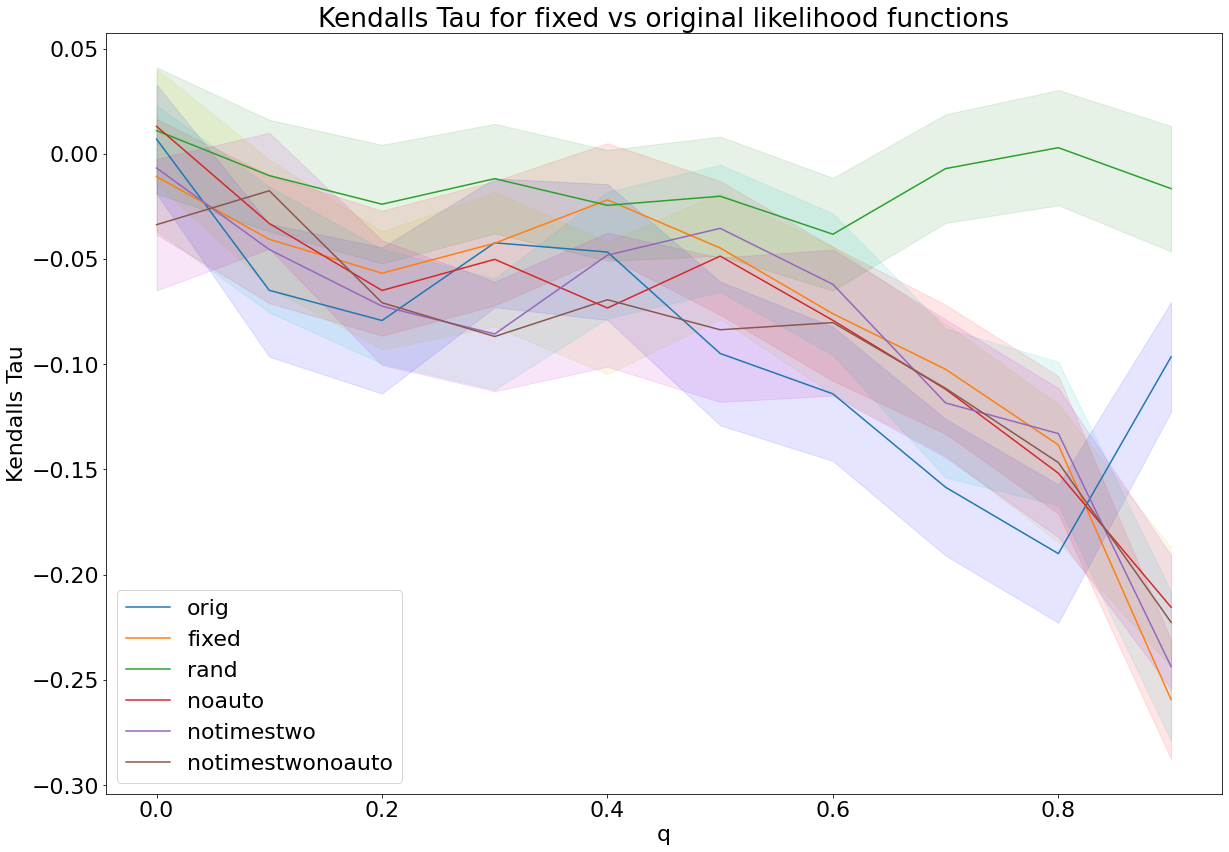

In [6]:
from Genetc import alignment as al
from Genetc import ancestral as anc
sampleNo=100
stepsBack=24
qVals=10
q_vals=[0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
steps_back=[i for i in range(stepsBack)]
plt.figure(figsize=(20,14))
nkVecMean=[]
testVecMean=[]
noautoVecMean=[]
randVecMean=[]
notimestwoVecMean=[]
notimestwonoautoVecMean=[]
nkVecStd=[]
testVecStd=[]
noautoVecStd=[]
randVecStd=[]
notimestwoVecStd=[]
notimestwonoautoVecStd=[]

for q in q_vals:
    nkVec=[]
    testVec=[]
    randVec=[]
    noautoVec=[]
    notimestwoVec=[]
    notimestwonoautoVec=[]
    
    print(q)
    for k in range(sampleNo):
        seedVector=[{i} for i in graphDict[q][k][0].nodes()]
        #print(seedVector)
        A_nk=[]
        A_test=[]
        A_rand=[]
        A_noauto=[]
        A_notimestwo=[]
        A_notimestwonoauto=[]
        A_true=[]
        A_nk.append(set(graphDict[q][k][-1].nodes).difference(set(G_nk[q][k][0].nodes)))
        A_test.append(set(graphDict[q][k][-1].nodes).difference(set(G_test[q][k][0].nodes)))
        A_rand.append(set(graphDict[q][k][-1].nodes).difference(set(G_rand[q][k][0].nodes)))
        A_noauto.append(set(graphDict[q][k][-1].nodes).difference(set(G_noauto[q][k][0].nodes)))
        A_notimestwo.append(set(graphDict[q][k][-1].nodes).difference(set(G_notimestwo[q][k][0].nodes)))
        A_notimestwonoauto.append(set(graphDict[q][k][-1].nodes).difference(set(G_notimestwonoauto[q][k][0].nodes)))
        A_true.append(set(graphDict[q][k][-1].nodes).difference(set(graphDict[q][k][-2].nodes)))
        
        for i in range(stepsBack):
            A_true.append(set(graphDict[q][k][-i-2].nodes).difference(set(graphDict[q][k][-i-3].nodes)))
            
            A_test.append(set(G_test[q][k][i].nodes).difference(set(G_test[q][k][i+1].nodes)))
            A_nk.append(set(G_nk[q][k][i].nodes).difference(set(G_nk[q][k][i+1].nodes)))
            A_rand.append(set(G_rand[q][k][i].nodes).difference(set(G_rand[q][k][i+1].nodes)))
            A_noauto.append(set(G_noauto[q][k][i].nodes).difference(set(G_noauto[q][k][i+1].nodes)))
            A_notimestwo.append(set(G_notimestwo[q][k][i].nodes).difference(set(G_notimestwo[q][k][i+1].nodes)))
            A_notimestwonoauto.append(set(G_notimestwonoauto[q][k][i].nodes).difference(set(G_notimestwonoauto[q][k][i+1].nodes)))
        #for i in range(len(graphDict[q][k])):
        #    A_true.append(set(graphDict[q][k][i-1].nodes).difference(set(graphDict[q][k][i-2].nodes)))
        
        #print(A_true,seedVector)
        nkVec.append(anc.kendalls_tau(A_nk,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=False))
        testVec.append(anc.kendalls_tau(A_test,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=False))
        randVec.append(anc.kendalls_tau(A_rand,A_true,count_all=False,useSeedVector=True,seedVector=seedVector,orderedSeed=False))
        noautoVec.append(anc.kendalls_tau(A_noauto,A_true,count_all=False,useSeedVector=True,seedVector=seedVector))
        notimestwoVec.append(anc.kendalls_tau(A_notimestwo,A_true,count_all=False,useSeedVector=True,seedVector=seedVector))
        notimestwonoautoVec.append(anc.kendalls_tau(A_notimestwonoauto,A_true,count_all=False,useSeedVector=True,seedVector=seedVector))
    nkVecMean.append(np.mean(nkVec))
    #print(nkVec)
    nkVecStd.append(np.std(nkVec,ddof=1))
        
    testVecMean.append(np.mean(testVec))
    testVecStd.append(np.std(testVec,ddof=1))

    randVecMean.append(np.mean(randVec))
    randVecStd.append(np.std(randVec,ddof=1))

    noautoVecMean.append(np.mean(noautoVec))
    noautoVecStd.append(np.std(noautoVec,ddof=1))

    notimestwoVecMean.append(np.mean(notimestwoVec))
    notimestwoVecStd.append(np.std(notimestwoVec,ddof=1))

    notimestwonoautoVecMean.append(np.mean(notimestwonoautoVec))
    notimestwonoautoVecStd.append(np.std(notimestwonoautoVec,ddof=1))
nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
#print("len",nkVecStdUp)
nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
randVecStdUp=[randVecMean[i]+1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
randVecStdDown=[randVecMean[i]-1.96*randVecStd[i]/np.sqrt(sampleNo) for i in range(qVals)]
noautoVecStdUp=[noautoVecMean[i]+1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(10)]
noautoVecStdDown=[noautoVecMean[i]-1.96*noautoVecStd[i]/np.sqrt(sampleNo) for i in range(10)]
notimestwoVecStdUp=[notimestwoVecMean[i]+1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(10)]
notimestwoVecStdDown=[notimestwoVecMean[i]-1.96*notimestwoVecStd[i]/np.sqrt(sampleNo) for i in range(10)]
notimestwonoautoVecStdUp=[notimestwonoautoVecMean[i]+1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(10)]
notimestwonoautoVecStdDown=[notimestwonoautoVecMean[i]-1.96*notimestwonoautoVecStd[i]/np.sqrt(sampleNo) for i in range(10)]

q_vals=[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
print(nkVecMean)
nkVecMean.append(nkVecMean.pop(nkVecMean.index(nkVecMean[0])))
testVecMean.append(testVecMean.pop(testVecMean.index(testVecMean[0])))
randVecMean.append(randVecMean.pop(randVecMean.index(randVecMean[0])))
noautoVecMean.append(noautoVecMean.pop(noautoVecMean.index(noautoVecMean[0])))
notimestwoVecMean.append(notimestwoVecMean.pop(notimestwoVecMean.index(notimestwoVecMean[0])))
notimestwonoautoVecMean.append(notimestwonoautoVecMean.pop(notimestwonoautoVecMean.index(notimestwonoautoVecMean[0])))
nkVecStdUp.append(nkVecStdUp.pop(nkVecStdUp.index(nkVecStdUp[0])))
nkVecStdDown.append(nkVecStdDown.pop(nkVecStdDown.index(nkVecStdDown[0])))
testVecStdUp.append(testVecStdUp.pop(testVecStdUp.index(testVecStdUp[0])))
testVecStdDown.append(testVecStdDown.pop(testVecStdDown.index(testVecStdDown[0])))
randVecStdUp.append(randVecStdUp.pop(randVecStdUp.index(randVecStdUp[0])))
randVecStdDown.append(randVecStdDown.pop(randVecStdDown.index(randVecStdDown[0])))
noautoVecStdUp.append(noautoVecStdUp.pop(noautoVecStdUp.index(noautoVecStdUp[0])))
noautoVecStdDown.append(noautoVecStdDown.pop(noautoVecStdDown.index(noautoVecStdDown[0])))
notimestwoVecStdUp.append(notimestwoVecStdUp.pop(notimestwoVecStdUp.index(notimestwoVecStdUp[0])))
notimestwoVecStdDown.append(notimestwoVecStdDown.pop(notimestwoVecStdDown.index(notimestwoVecStdDown[0])))
notimestwonoautoVecStdUp.append(notimestwonoautoVecStdUp.pop(notimestwonoautoVecStdUp.index(notimestwonoautoVecStdUp[0])))
notimestwonoautoVecStdDown.append(notimestwonoautoVecStdDown.pop(notimestwonoautoVecStdDown.index(notimestwonoautoVecStdDown[0])))

font = {'size'   : 22}
plt.rc('font', **font)   
plt.plot(q_vals,nkVecMean,label="orig")
plt.plot(q_vals,testVecMean,label="fixed")
plt.plot(q_vals,randVecMean,label="rand")
plt.plot(q_vals,noautoVecMean,label="noauto")
plt.plot(q_vals,notimestwoVecMean,label="notimestwo")
plt.plot(q_vals,notimestwonoautoVecMean,label="notimestwonoauto")
#plt.plot(steps_back,nkVecStdUp,label="orig")
#plt.plot(steps_back,testVecStdUp,label="fixed")
#plt.plot(steps_back,nkVecStdDown,label="orig")
#plt.plot(steps_back,testVecStdDown,label="fixed")
plt.fill_between(q_vals, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
plt.fill_between(q_vals, testVecStdDown, testVecStdUp, color='r', alpha=.1)
plt.fill_between(q_vals, randVecStdDown, randVecStdUp, color='g', alpha=.1)
plt.fill_between(q_vals, noautoVecStdDown, noautoVecStdUp, color='y', alpha=.1)
plt.fill_between(q_vals, notimestwoVecStdDown, notimestwoVecStdUp, color='c', alpha=.1)
plt.fill_between(q_vals, notimestwonoautoVecStdDown, notimestwonoautoVecStdUp, color='m', alpha=.1)
plt.xlabel("q")
plt.ylabel("Kendalls Tau")
plt.title("Kendalls Tau for fixed vs original likelihood functions")
plt.legend()
plt.savefig('likelihood_test/'+seedType+'_seed/'+decideType+"_decide/kendalls_likelihood_function_comparison_"+".pdf")
#plt.show()
'''
for i in range(24):
    #print(len(G_nk[0.5][0][i].nodes))
    print(set(G_test[q][0][i].nodes).difference(set(G_test[q][0][i+1].nodes)))
    print(list(graphDict[q][0][-i-1].nodes)[-1])

for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2])-al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_nk[q][0][i],graphDict[q][0][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.ec_score(G_test[q][0][i],graphDict[q][0][-i-2]))
'''

## Simple tests

In [8]:
from Genetc import alignment as al
q=0.2
k=70
count=0
#print(list(graphDict[q][0][-1].nodes))
#plt.figure(figsize=(20,20))
#nx.draw(graphDict[q][k][-1],with_labels=True)
for q in [0.9]:
    for k in [60]:
        #print('nk',set(graphDict[q][k][-1].nodes).difference(set(G_nk[q][k][0].nodes)))
        #print('rand',set(graphDict[q][k][-1].nodes).difference(set(G_rand[q][k][0].nodes)))

        for i in range(24):
            #print(len(G_nk[0.5][0][i].nodes))
            print('notimesTwo',set(G_notimestwo[q][k][i].nodes).difference(set(G_notimestwo[q][k][i+1].nodes)))
            #print('rand',set(G_rand[q][k][i].nodes).difference(set(G_rand[q][k][i+1].nodes)))
            for p in set(G_rand[q][k][i].nodes).difference(set(G_rand[q][k][i+1].nodes)):
                if '_' in list(str(p)):
                    count=count+1
            #print(maxPairsTest[q][k][i+1])
            #print(list(graphDict[q][0][-i-1].nodes)[-1])
print(count/1000)
for i in range(25):
    print(al.quick_ec_score(G_notimestwo[q][k][i],graphDict[q][k][-i-2])-al.quick_ec_score(G_nk[q][k][i],graphDict[q][k][-i-2]))
print("------------------------------")
for i in range(25):
    print(al.quick_ec_score(G_notimestwo[q][k][i],graphDict[q][k][-i-2]))
print(G_noauto[q][k][i].nodes())
print("------------------------------")
for i in range(25):
    print(al.quick_ec_score(G_nk[q][k][i],graphDict[q][k][-i-2]))

notimesTwo {'21_4_9'}
notimesTwo {23}
notimesTwo {'19_18'}
notimesTwo {19}
notimesTwo {2}
notimesTwo {'4_20'}
notimesTwo {'21_4'}
notimesTwo {'4_16'}
notimesTwo {20}
notimesTwo {1}
notimesTwo {21}
notimesTwo {3}
notimesTwo {'0_2_14_17'}
notimesTwo {5}
notimesTwo {'0_2_14_19'}
notimesTwo {24}
notimesTwo {'0_13'}
notimesTwo {11}
notimesTwo {'23_7'}
notimesTwo {'0_2_14'}
notimesTwo {17}
notimesTwo {'0_13_23'}
notimesTwo {22}
notimesTwo {'23_1'}
0.014
-0.0010101010101010166
-0.004802744425385863
-0.009440559440559437
-0.018538324420677377
-0.00545454545454549
-0.019666048237476863
0.005029013539651794
-0.002371541501976271
-0.05858585858585863
0.050000000000000044
0.03890063424947149
0.01601731601731604
0.03281596452328156
-0.009756097560975618
-0.046563192904656325
-0.03477868112014454
-0.03477868112014454
-0.03477868112014454
-0.059168925022583585
-0.015740740740740722
0.04629629629629631
0.052706552706552695
0.038461538461538464
0.009971509971509973
0.009971509971509973
----------------

In [ ]:
from Genetc import alignment as al
steps_back=[i for i in range(24)]
for q in [0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    nkVecStdUp=[nkVecMean[i]+ 1.96*nkVecStd[i]/10 for i in range(24)]
    #print("len",nkVecStdUp)
    print(np.std(nkVec,ddof=1))
    print(np.mean(nkVec))
    nkVecStdDown=[nkVecMean[i]-1.96*nkVecStd[i]/10 for i in range(24)]
    testVecStdUp=[testVecMean[i]+1.96*testVecStd[i]/10 for i in range(24)]
    testVecStdDown=[testVecMean[i]-1.96*testVecStd[i]/10 for i in range(24)]
    plt.figure(figsize=(20,14))
    plt.plot(steps_back,nkVecMean,label="orig")
    plt.plot(steps_back,testVecMean,label="fixed")
    #plt.plot(steps_back,nkVecStdUp,label="orig")
    #plt.plot(steps_back,testVecStdUp,label="fixed")
    #plt.plot(steps_back,nkVecStdDown,label="orig")
    #plt.plot(steps_back,testVecStdDown,label="fixed")
    plt.fill_between(steps_back, nkVecStdDown, nkVecStdUp, color='b', alpha=.1)
    plt.fill_between(steps_back, testVecStdDown, testVecStdUp, color='r', alpha=.1)
    plt.xlabel("Steps back")
    plt.ylabel("Percentage correct edges of true graph")
    plt.title("Percent edge correctness for fixed vs original likelihood functions q="+str(q))
    plt.legend()
    plt.savefig("likelihood_function_comparison_"+str(q)+".pdf")
    #plt.show()